# Case Study #10 - Probability
#### Dataset used:- mushrooms.csv
To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

In [1]:
#Importing the python libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Exploratory Data Analysis

In [5]:
#Defining a function for countplots
features = data.drop(columns='class')

In [6]:
#copying DataFrame to 'df'
df = data.copy(deep=True)

In [7]:
#count of the unique occurrences of ‘class’ column
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

#### Observations:
From the above analysis, we can see there are 4208 edible mushrooms and 3916 poisonous mushrooms in the dataset.

### Data Preprocessing
Label Encoding

In [8]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

#### Comments:
Here, all our columns are of categorical type and we are using Label Encoder to convert categorical values to numeric.

In [9]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
for column in df.columns:
    df[column] = labelenc.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


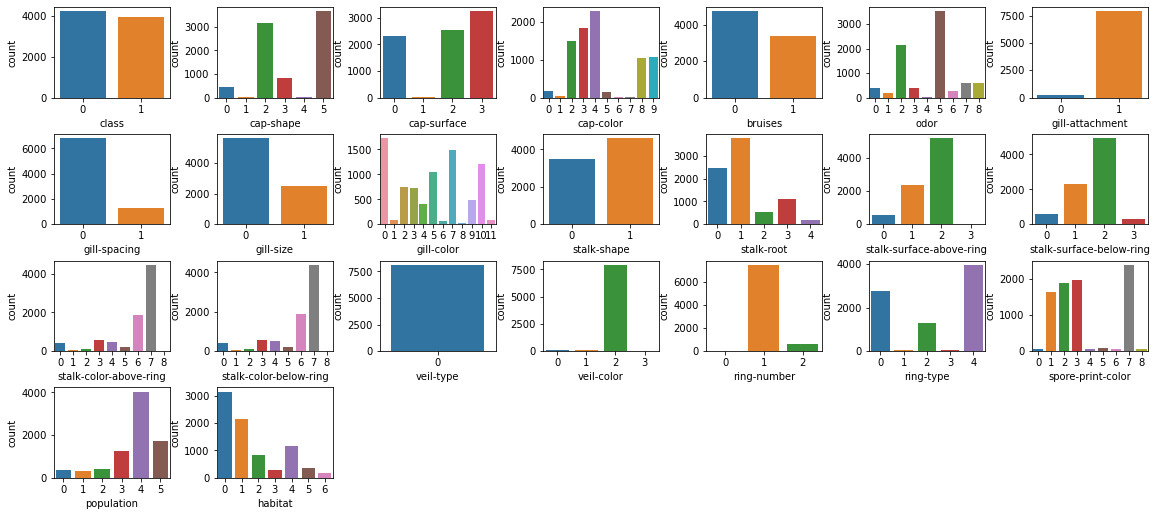

In [10]:
#EDA after encoding
figure = plt.figure(figsize=(19 , 19))
for i, c in enumerate(df.columns):
    figure.add_subplot(10, 7, i+1)
    sns.countplot(x = f"{c}", data=df)
    plt.subplots_adjust(left=0.1,bottom=0,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

In [11]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

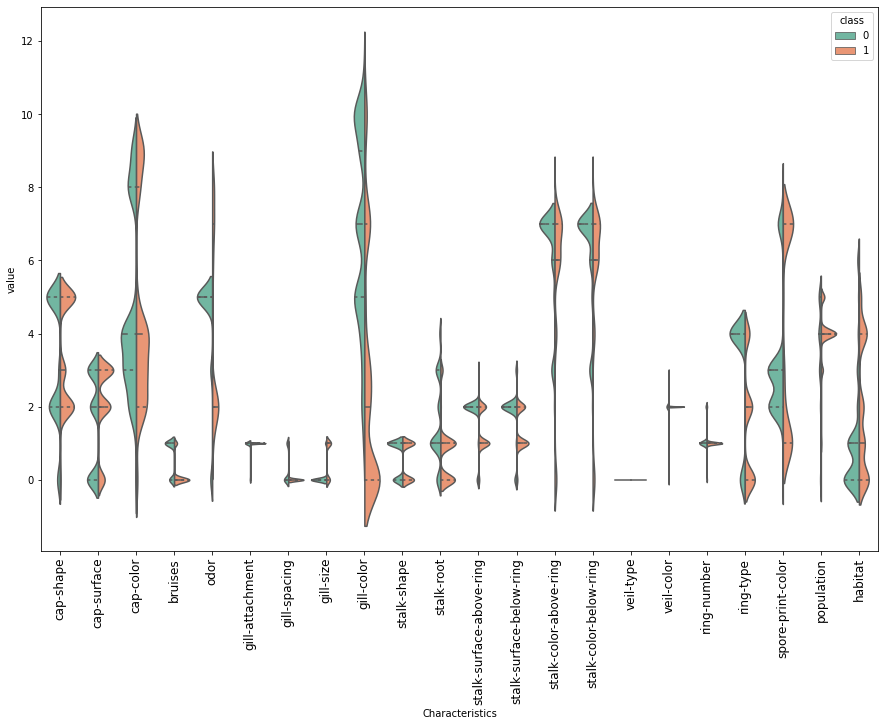

In [12]:
#violin plot represents the distribution of the feature characteristics
df_dropclass = df.drop(['class'], axis=1)
df_violin = pd.melt(df, 'class', var_name='Characteristics')
fig, ax = plt.subplots(figsize=(15,10))
vioplt = sns.violinplot(ax=ax, x='Characteristics', y='value', hue='class', data=df_violin, split=True, inner='quartile', palette='Set2')
vioplt.set_xticklabels(rotation=90, labels=list(df_dropclass.columns), fontsize=12);

#### Note:
##### Green Edible-0
##### Orange Poisonous-1
From violin plot we get a clear inference about the density distribution of features.

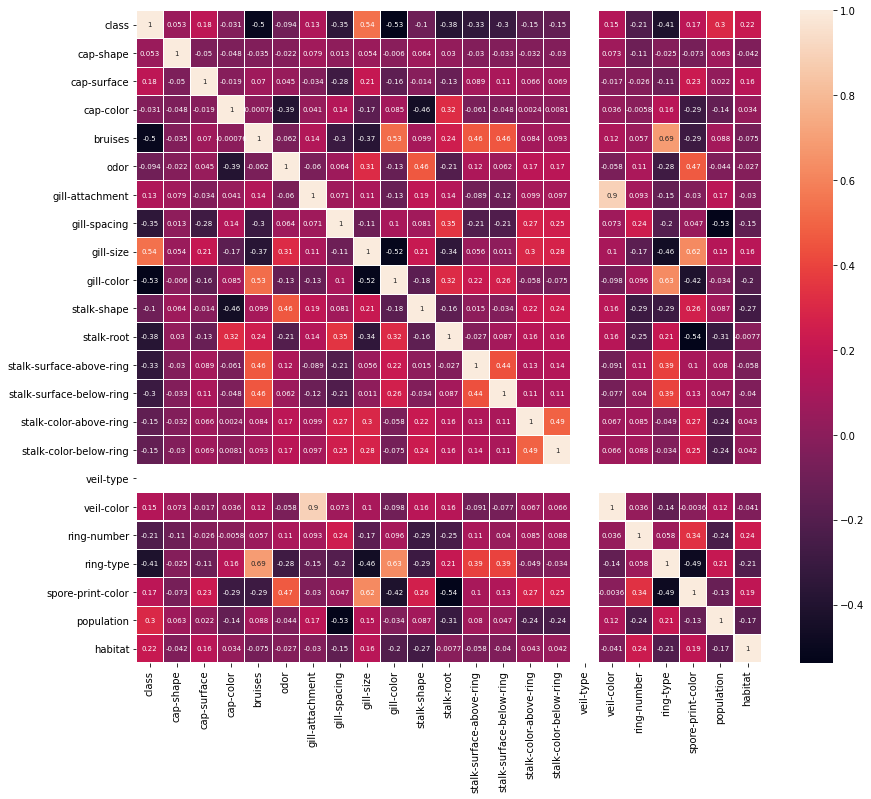

In [13]:
corr = df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, linewidths=.1, annot=True, annot_kws={'size': 7})
plt.yticks(rotation=0);

#### Observations:
The column veil-type is of correlation 0 and is not contributing to the data so we’ll remove it.

Gill color, gill size, ring type, stalk root and gill spacing are more correlated to class.

In [14]:
df = df.drop(['veil-type'], axis=1)
corr['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

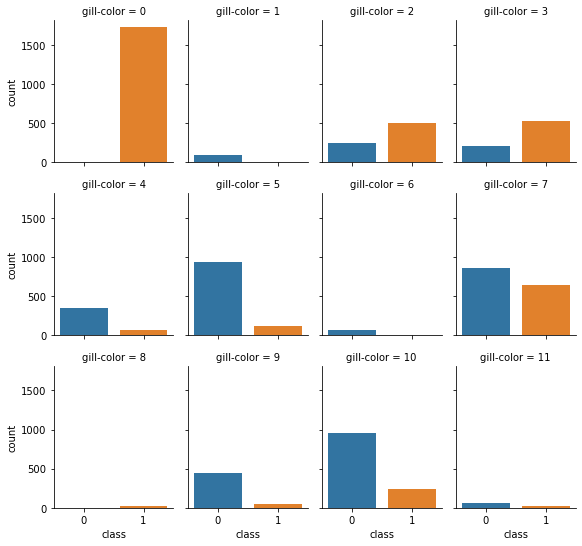

In [15]:
sns.catplot('class', col='gill-color', data=df, kind='count', height=2.5, aspect=.8, col_wrap=4)
plt.show();

### Prediction Model

In [16]:
#defining target and features for models
from sklearn.model_selection import train_test_split
X = df.drop(['class'], axis=1)
y = df['class']

In [17]:
#creating test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [18]:
#setting up results dictionary to save different model accuracy results
results_dict={}

In [19]:
#function to print results with test set and prediction variable
def getresults(test, pred_variable):
    return "F1:", metrics.f1_score(test, pred_variable), "Accuracy:", metrics.accuracy_score(y_test, pred_variable)

### Classification Methods:

#### 1. Decision Tree Classifier

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
#parameter tuning using GridSearchCV
dtc = DecisionTreeClassifier()
param_grid = {'max_depth': [1,11,15],
            'min_samples_leaf': [2,10,30],
            'splitter': ['best','random'],
            'criterion':['gini','entropy']}

dtc_grid = GridSearchCV(dtc, param_grid, cv=3, verbose=1)

In [22]:
#fitting tuned parameters
dtc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 11, 15],
                         'min_samples_leaf': [2, 10, 30],
                         'splitter': ['best', 'random']},
             verbose=1)

In [23]:
y_pred_dtc_grid = dtc_grid.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dtc_grid))
print("Test Accuracy: {}%".format(round(dtc_grid.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


In [24]:
#pass results to dictionary
results_dict['Decision Tree Classifier'] = getresults(y_test, y_pred_dtc_grid)

#### Comments:
It can be concluded that test & train set predictions are 100% accurate.

In [25]:
#feature importance scores
fea_imp = dtc_grid.best_estimator_.feature_importances_
feature_importance = pd.DataFrame(fea_imp, index=X.columns)
feature_importance.sort_values(by=0, ascending=False).head(10)

,0
gill-color,0.339818
spore-print-color,0.206318
population,0.179928
gill-size,0.128043
stalk-root,0.046976
bruises,0.027410
stalk-shape,0.025505
stalk-color-below-ring,0.017881
habitat,0.017449
stalk-surface-above-ring,0.004066


##### 2. KNN Classifier:

In [26]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


In [27]:
#pass results to dictionary
results_dict['KNN Classifier'] = getresults(y_test, y_pred_knn)

#### 3. Random Forest Classifier:


In [28]:
#Random Forest Classification:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [29]:
#parameter tuning using GridSearchCV
param_grid_rf={
    'max_depth': [5,11],
    'n_estimators': [200,500],
    'max_features': [5,10,20],
    'min_samples_leaf': [2,6],
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

In [30]:
#fitting tuned parameters
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 11], 'max_features': [5, 10, 20],
                         'min_samples_leaf': [2, 6],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=1)

In [31]:
#Predicting and estimating the result:

y_pred_rf = grid_rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))
print("Test Accuracy: {}%".format(round(grid_rf.score(X_test, y_test)*100, 2)))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


In [32]:
#pass results to dictionary
results_dict['Random Forest Classifier'] = getresults(y_test, y_pred_rf)

#### 4. Naive Bayes Classifier

In [33]:
#Gaussian
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))
print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       433
           1       0.91      0.94      0.92       380

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813

Test Accuracy: 92.62%


In [35]:
#pass results to dictionary
results_dict['Naive Bayes'] = getresults(y_test, y_pred_nb)

In [36]:
#print dictionary of result scores
results_dict

{'Decision Tree Classifier': ('F1:', 1.0, 'Accuracy:', 1.0),
 'KNN Classifier': ('F1:', 0.9960681520314547, 'Accuracy:', 0.996309963099631),
 'Random Forest Classifier': ('F1:', 1.0, 'Accuracy:', 1.0),
 'Naive Bayes': ('F1:', 0.922279792746114, 'Accuracy:', 0.9261992619926199)}

##### Conclusion:
Naive Bayes have a score of 92% but it would not be a good choice given that the model predicted false negatives which could be dangerous.

Since the other models especially Random Forest Classifier or Decision Tree Classifier performed perfectly; they will be much better suited for this problem.